**IMAGENET** **ON** **MOBILENET** **ARCHITECTURE** **AND** **RETRAINING** **OF** **THE** **COMPLETE** **MOBILENET** **MODEL** 

**ABSTRACT** : To retrain the complete MOBILENET model architecture where input is the pretrained model values of IMAGENET in order to increase the accuracy of the model and compare the results with other models and techniques.

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K
from keras.utils.np_utils import to_categorical 
from keras.callbacks import ReduceLROnPlateau

In [ ]:
X_train = np.load("/content/drive/My Drive/256_192_train.npy")

In [ ]:
X_train.shape

(8111, 192, 256, 3)

X_train is a 4D array.

In [ ]:
y_train = np.load("/content/drive/My Drive/train_labels.npy")

In [ ]:
X_val = np.load("/content/drive/My Drive/256_192_val.npy")

In [ ]:
y_val = np.load("/content/drive/My Drive/val_labels.npy")

In [ ]:
X_train.shape, X_val.shape

((8111, 192, 256, 3), (902, 192, 256, 3))

In [ ]:
y_train.shape, y_val.shape

((8111,), (902,))

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
y_train.shape, y_val.shape

((8111, 7), (902, 7))

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

In [ ]:
for layer in base_model.layers:
    print(layer.name)
    layer.trainable = False
    
print(len(base_model.layers))

input_1
conv1_pad
conv1
conv1_bn
conv1_relu
conv_dw_1
conv_dw_1_bn
conv_dw_1_relu
conv_pw_1
conv_pw_1_bn
conv_pw_1_relu
conv_pad_2
conv_dw_2
conv_dw_2_bn
conv_dw_2_relu
conv_pw_2
conv_pw_2_bn
conv_pw_2_relu
conv_dw_3
conv_dw_3_bn
conv_dw_3_relu
conv_pw_3
conv_pw_3_bn
conv_pw_3_relu
conv_pad_4
conv_dw_4
conv_dw_4_bn
conv_dw_4_relu
conv_pw_4
conv_pw_4_bn
conv_pw_4_relu
conv_dw_5
conv_dw_5_bn
conv_dw_5_relu
conv_pw_5
conv_pw_5_bn
conv_pw_5_relu
conv_pad_6
conv_dw_6
conv_dw_6_bn
conv_dw_6_relu
conv_pw_6
conv_pw_6_bn
conv_pw_6_relu
conv_dw_7
conv_dw_7_bn
conv_dw_7_relu
conv_pw_7
conv_pw_7_bn
conv_pw_7_relu
conv_dw_8
conv_dw_8_bn
conv_dw_8_relu
conv_pw_8
conv_pw_8_bn
conv_pw_8_relu
conv_dw_9
conv_dw_9_bn
conv_dw_9_relu
conv_pw_9
conv_pw_9_bn
conv_pw_9_relu
conv_dw_10
conv_dw_10_bn
conv_dw_10_relu
conv_pw_10
conv_pw_10_bn
conv_pw_10_relu
conv_dw_11
conv_dw_11_bn
conv_dw_11_relu
conv_pw_11
conv_pw_11_bn
conv_pw_11_relu
conv_pad_12
conv_dw_12
conv_dw_12_bn
conv_dw_12_relu
conv_pw_12
conv_pw_12_

**MODEL** **BUILDING**

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

### TRAINING

**Feature** Extraction

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [ ]:
batch_size = 32
epochs = 3
history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size), 
                              validation_steps=(X_val.shape[0] // batch_size))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
253/253 [==============================] - 1173s 5s/step - loss: 0.8443 - accuracy: 0.7062 - val_loss: 1.6662 - val_accuracy: 0.5536
Epoch 2/3
253/253 [==============================] - 1159s 5s/step - loss: 0.7109 - accuracy: 0.7469 - val_loss: 0.9731 - val_accuracy: 0.6830
Epoch 3/3
253/253 [==============================] - 1162s 5s/step - loss: 0.6537 - accuracy: 0.7684 - val_loss: 1.1111 - val_accuracy: 0.6362


The model achieved an accuracy of just 65.37% at an epoch value of 3. In order to increase the accuracy of the model, one can fine tune/ retrain the complete model again.

**RETRAINING** 

NOTE : As we are retraining the complete model, we need not provide a specific number of the layer, we are considering all the layers of the model, hence the below command is applicable.

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

In [ ]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)   

In [ ]:
batch_size = 32
epochs = 15
history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

Epoch 1/15
253/253 [==============================] - 1653s 7s/step - loss: 0.5599 - acc: 0.8025 - val_loss: 0.6349 - val_acc: 0.7667
Epoch 2/15
253/253 [==============================] - 1635s 6s/step - loss: 0.4878 - acc: 0.8231 - val_loss: 0.5439 - val_acc: 0.8114
Epoch 3/15
253/253 [==============================] - 1620s 6s/step - loss: 0.4598 - acc: 0.8348 - val_loss: 0.5782 - val_acc: 0.8013
Epoch 4/15
253/253 [==============================] - 1619s 6s/step - loss: 0.4359 - acc: 0.8426 - val_loss: 0.5036 - val_acc: 0.8237
Epoch 5/15
253/253 [==============================] - 1627s 6s/step - loss: 0.4112 - acc: 0.8518 - val_loss: 0.5687 - val_acc: 0.7946
Epoch 6/15
253/253 [==============================] - 1606s 6s/step - loss: 0.3806 - acc: 0.8603 - val_loss: 0.6135 - val_acc: 0.8080
Epoch 7/15
253/253 [==============================] - ETA: 0s - loss: 0.3572 - acc: 0.8728
Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
253/253 [================

**NOTE** : From the above training accuracy, one can see that it is 91.20% which is the highest amongst all the other model training accuracies.

Hence one can conclude that after retraining the entire model, the accuracy has risen to a great extent.

**NOTE** : Now calculating the validation set accuracy.

In [31]:
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))

29/29 [==============================] - 31s 1s/step - loss: 0.5134 - acc: 0.8304
Validation: accuracy = 0.830377  ;  loss_v = 0.513407


**NOTE** : The validation set accuracy is equal to 83.03% which is lesser than the train set accuracy. 

**TESTING**

In [32]:
# Loading the test set data
X_test = np.load("/content/drive/My Drive/256_192_test.npy")

In [33]:
X_test.shape

(1002, 192, 256, 3)

One can see that the shape of X_test is a 4D array as this is image data of size 192x256x3.

In [34]:
# Loading the output test set data
y_test = np.load("/content/drive/My Drive/test_labels.npy")
y_test = to_categorical(y_test)

In [35]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 35s 1s/step - loss: 0.5825 - acc: 0.8174
Test: accuracy = 0.817365  ;  loss = 0.582488


**NOTE** : The test set accuracy comes out to be 81.7365% which is lesser than both the training set and validation set accuracies. This is a good thing as this how exactly a model should perform.

In [36]:
model.save("MobileNet.h5")

Text(0.5, 1.0, 'Training and validation loss')

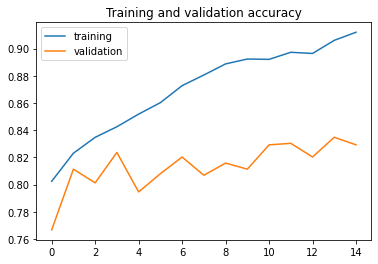

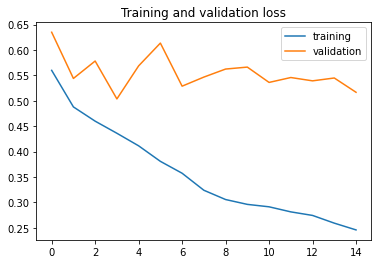

In [37]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label = "training")
plt.plot(epochs, val_acc, label = "validation")
plt.legend(loc="upper left")
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label = "training")
plt.plot(epochs, val_loss, label = "validation")
plt.legend(loc="upper right")
plt.title('Training and validation loss')

**NOTE** : The above graph shows the plot of training and validation accuracy and loss respectively. The training set accuracy is clearly higher than the validation set accuracy and it is the vice versa for the plot of loss.

**CONCLUSION** : From the above code, one can conclude that it is always better to retrain the complete model in the process of transfer learning, as it is faster as well as the accuracy that is achieved by this method is also higher as compared to the model when it was just fine tuned.

The training set accuracy when the model was not retrained: 63.75% at epoch value of 3, which was pretty low.

The training set accuracy after retraining : 91.20% which is pretty high as compared to the previous set.

**CONTRIBUTIONS** : 

Code by self : 60%

Code by reference : 40%

**CITATIONS** : 

SKIN CANCER MNIST DATASET KAGGLE: https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

OVERVIEW OF IMAGE CLASSIFICATION USING CNN: https://analyticsindiamag.com/deep-learning-image-classification-with-cnn-an-overview/

IMAGE CLASSIFICATION USING MOBILENET MEDIUM: https://medium.com/analytics-vidhya/image-classification-using-mobilenet-in-the-browser-b69f2f57abf





LICENSE

Copyright 2019 Ria Rajput

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

